In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier  as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
#instantiating object for KFold validation
kf = KFold(10)

#creating a list of classifiers
list_classifiers = [
    KNN(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    LogisticRegression()]

#creating a list of the name of classifiers
name_classifiers = ["KNN", "SVC", "DecisionTree", "RandomForest",
                    "GaussianNB", "MultinomialNB","BernoulliNB",
                    "LogisticRegression"]

# 1. Feature Extraction Technique: AAC

In [3]:
'''
    DATA PRE-PROCESSING
'''

#reading the data
df = pd.read_csv('data_aac.csv')

#getting the column with fasta format labels
label = df['negative|P01023|A2M']
df = df.drop(['negative|P01023|A2M'], axis = 1)

#converting the fasta format labels into '0' for negative and '1' for positive class
label = list(label)
count = 0
for i in label:
    
    if 'negative' in i:
        label[count] = '0'
    else:
        label[count] = '1'
    
    count+=1
    
headers = list()

#creating a list of headers
for i in range(20):
    headers.append(i+1)
    
#appending the headers to the data    
df.columns = headers

#creating a new column of the transformed labels
df['Labels'] = label

In [4]:
target = df['Labels']
df.drop(['Labels'], 1, inplace = True)

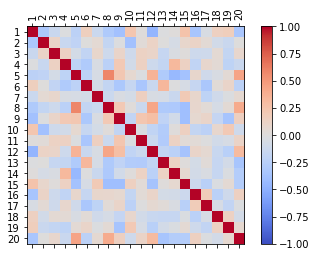

In [5]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation ,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [6]:
'''
    K-FOLD CROSS VALIDATION
'''
count = 0
for classifier in list_classifiers:
    
    acc_total = 0
    
    for train_index, test_index in kf.split(df):
    
        X_train = df.values[train_index]
        Y_train = target[train_index]
    
        X_test = df.values[test_index]
        Y_test = target[test_index]
    
        model_svm = classifier.fit(X_train,Y_train)
    
        predictions = model_svm.predict(X_test)
    
        acc = 100*accuracy_score(Y_test,predictions)
    
    
        acc_total = acc_total + acc
    
    print('{} accuracy = {}'.format(name_classifiers[count], np.round(acc_total/10, 2)))
    count += 1

KNN accuracy = 87.4
SVC accuracy = 70.56
DecisionTree accuracy = 71.9
RandomForest accuracy = 78.57
GaussianNB accuracy = 84.33
MultinomialNB accuracy = 70.56
BernoulliNB accuracy = 68.48
LogisticRegression accuracy = 70.56


# 2. Feature Extraction Technique: CTDD

In [7]:
df = pd.read_csv('data_ctdd.csv')

label = df['positive|P02647|APO']

df = df.drop(['positive|P02647|APO'], axis = 1)

label = list(label)
count = 0
for i in label:
    
    if 'negative' in i:
        label[count] = '0'
    else:
        label[count] = '1'
    
    count+=1
    
headers = list()
for i in range(195):
    headers.append(i+1)
    
df.columns = headers
df['Labels'] = label

In [8]:
target = df['Labels']
df = df.drop(['Labels'], axis = 1)

In [9]:
count = 0

for classifier in list_classifiers:
    
    acc_total = 0
    
    for train_index, test_index in kf.split(df):
    
        X_train = df.values[train_index]
        Y_train = target[train_index]
    
        X_test = df.values[test_index]
        Y_test = target[test_index]
    
        model_svm = classifier.fit(X_train,Y_train)
    
        predictions = model_svm.predict(X_test)
    
        acc = 100*accuracy_score(Y_test,predictions)
    
        acc_total = acc_total + acc
    
    print('{} accuracy = {}'.format(name_classifiers[count], np.round(acc_total/10, 2)))
    count += 1

KNN accuracy = 82.4
SVC accuracy = 72.63
DecisionTree accuracy = 74.47
RandomForest accuracy = 85.73
GaussianNB accuracy = 44.68
MultinomialNB accuracy = 80.82
BernoulliNB accuracy = 72.11
LogisticRegression accuracy = 76.08


# 3. Feature Extraction Technique: GDPC

In [10]:
df = pd.read_csv('data_gdpc.csv')

In [11]:
label = df['positive|P02647|APO']

df = df.drop(['positive|P02647|APO'], axis = 1)

label = list(label)
count = 0
for i in label:
    
    if 'negative' in i:
        label[count] = '0'
    else:
        label[count] = '1'
    
    count+=1
    
headers = list()
for i in range(25):
    headers.append(i+1)
    
df.columns = headers
df['Labels'] = label

In [12]:
target = df['Labels']
df = df.drop(['Labels'], axis = 1)

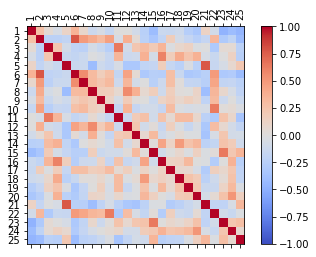

In [13]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation ,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [14]:
count = 0

for classifier in list_classifiers:
    
    acc_total = 0
    
    for train_index, test_index in kf.split(df):
    
        X_train = df.values[train_index]
        Y_train = target[train_index]
    
        X_test = df.values[test_index]
        Y_test = target[test_index]
    
        model_svm = classifier.fit(X_train,Y_train)
    
        predictions = model_svm.predict(X_test)
    
        acc = 100*accuracy_score(Y_test,predictions)
    
        acc_total = acc_total + acc
    
    print('{} accuracy = {}'.format(name_classifiers[count], np.round(acc_total/10, 2)))
    count += 1

KNN accuracy = 85.73
SVC accuracy = 72.63
DecisionTree accuracy = 73.42
RandomForest accuracy = 86.26
GaussianNB accuracy = 81.93
MultinomialNB accuracy = 72.63
BernoulliNB accuracy = 72.63
LogisticRegression accuracy = 72.63


# 4. Feature Extraction Technique: Polarity

In [15]:
df = pd.read_csv('data_polarity.csv')

In [16]:
label = df['positive|P02647|APO']

df = df.drop(['positive|P02647|APO'], axis = 1)

label = list(label)
count = 0
for i in label:
    
    if 'negative' in i:
        label[count] = '0'
    else:
        label[count] = '1'
    
    count+=1
    
headers = list()
for i in range(20):
    headers.append(i+1)
    
df.columns = headers
df['Labels'] = label

In [17]:
target = df['Labels']
df = df.drop(['Labels'], axis = 1)

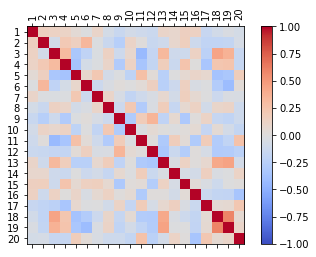

In [18]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation ,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [19]:
count = 0
for classifier in list_classifiers:

    acc_total = 0
    
    for train_index, test_index in kf.split(df):
    
        X_train = df.values[train_index]
        Y_train = target[train_index]
    
        X_test = df.values[test_index]
        Y_test = target[test_index]
    
        model_svm = classifier.fit(X_train,Y_train)
    
        predictions = model_svm.predict(X_test)
    
        acc = 100*accuracy_score(Y_test,predictions)
    
        acc_total = acc_total + acc
    
    print('{} accuracy = {}'.format(name_classifiers[count], np.round(acc_total/10, 2)))
    count += 1

KNN accuracy = 84.68
SVC accuracy = 72.63
DecisionTree accuracy = 77.05
RandomForest accuracy = 80.99
GaussianNB accuracy = 82.49
MultinomialNB accuracy = 72.63
BernoulliNB accuracy = 69.42
LogisticRegression accuracy = 72.63


# 5. Feature Extraction Technique: TPC

In [20]:
df = pd.read_csv('data_tpc.csv')

In [21]:
label = df['positive|P02647|APO']

df = df.drop(['positive|P02647|APO'], axis = 1)

label = list(label)
count = 0
for i in label:
    
    if 'negative' in i:
        label[count] = '0'
    else:
        label[count] = '1'
    
    count+=1
    
headers = list()
for i in range(254):
    headers.append(i+1)
    
df.columns = headers
df['Labels'] = label

In [22]:
target = df['Labels']
df = df.drop(['Labels'], axis = 1)

In [23]:
count = 0

for i in list_classifiers:
    
    clf=i
    acc_total = 0
    
    for train_index, test_index in kf.split(df):
    
        X_train = df.values[train_index]
        Y_train = target[train_index]
    
        X_test = df.values[test_index]
        Y_test = target[test_index]
    
        model_svm = clf.fit(X_train,Y_train)
    
        predictions = model_svm.predict(X_test)
    
        acc = 100*accuracy_score(Y_test,predictions)
    
    
        acc_total = acc_total + acc
    
    print('{} accuracy = {}'.format(name_classifiers[count], np.round(acc_total/10, 2)))
    count += 1

KNN accuracy = 72.11
SVC accuracy = 72.63
DecisionTree accuracy = 65.99
RandomForest accuracy = 74.21
GaussianNB accuracy = 50.0
MultinomialNB accuracy = 72.63
BernoulliNB accuracy = 78.92
LogisticRegression accuracy = 72.63


#  6. Feature Extraction Technique: DPC

In [24]:
df = pd.read_csv('data_dpc.csv')

In [25]:
label = df['positive|P02647|APO']

df = df.drop(['positive|P02647|APO'], axis = 1)

label = list(label)
count = 0
for i in label:
    
    if 'negative' in i:
        label[count] = '0'
    else:
        label[count] = '1'
    
    count+=1
    
headers = list()
for i in range(400):
    headers.append(i+1)
    
df.columns = headers
df['Labels'] = label

In [26]:
target = df['Labels']
df = df.drop(['Labels'], axis = 1)

In [27]:
count = 0

for i in list_classifiers:
    
    clf=i
    acc_total = 0
    
    for train_index, test_index in kf.split(df):
    
        X_train = df.values[train_index]
        Y_train = target[train_index]
    
        X_test = df.values[test_index]
        Y_test = target[test_index]
    
        model_svm = clf.fit(X_train,Y_train)
    
        predictions = model_svm.predict(X_test)
    
        acc = 100*accuracy_score(Y_test,predictions)
    
    
        acc_total = acc_total + acc
    
    print('{} accuracy = {}'.format(name_classifiers[count], np.round(acc_total/10, 2)))
    count += 1

KNN accuracy = 84.74
SVC accuracy = 72.63
DecisionTree accuracy = 73.42
RandomForest accuracy = 75.23
GaussianNB accuracy = 82.54
MultinomialNB accuracy = 72.63
BernoulliNB accuracy = 82.05
LogisticRegression accuracy = 72.63
